In [1]:
import jax.numpy as jnp
from sympy import *

In [2]:
x,y,z=symbols('x y z')
init_printing(use_unicode=True)

In [3]:
print("\ncos(x) =",diff(cos(x),x),"\n")
diff(exp(x**2),x)


cos(x) = -sin(x) 



Podemos calcular derivadas complejas:
Tomelos la séptima derivada de exp(xyz) con respecto a sus variables, por ejemplo:

## $\frac{\partial^7}{\partial x \partial y^2 \partial z^4}\exp(xyz)$


In [4]:
expr= exp(x*y*z)
diff(expr,x,y,y,z,z,z,z)

Para las derivadas numéricas:
    
## $f'(x_i)\approx \frac{\Delta f}{\Delta x}= \frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def derivative(x,y):
    xp=np.zeros(len(x))
    yp=np.zeros(len(x))
    for i in range(len(x)-1):
        yp[i]=y[i+1]-y[i]
        xp[i]=x[i+1]-x[i]
    return (yp/xp)

In [6]:
x1=np.linspace(-10,10,100)
f1=x1**2*np.sin(x1)
der=derivative(x1,f1)

/Users/diegobarbosa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


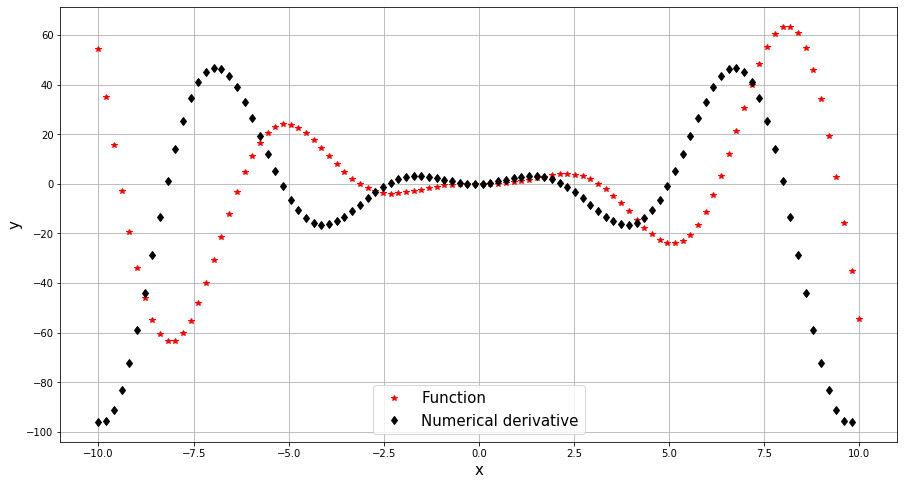

In [7]:
plt.figure(figsize=(15,8))
plt.plot(x1,f1,'r*',label='Function')
plt.plot(x1,der,'kd',label='Numerical derivative')
plt.legend(fontsize=15)
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend(fontsize=15)
plt.grid()

/Users/diegobarbosa/opt/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


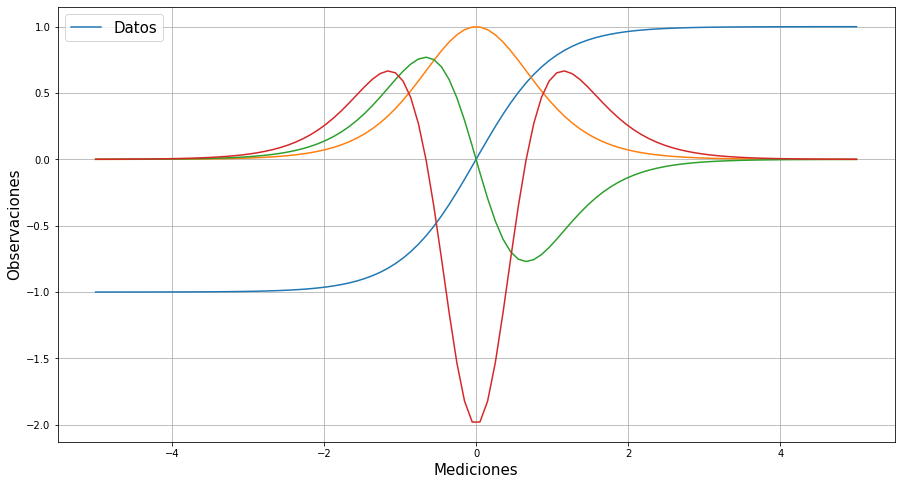

In [8]:
from jax import grad,jit,vmap
import jax.numpy as jnp

x=jnp.linspace(-5,5,100)
grad_f=jit(vmap(grad(jnp.tanh)))
g2=jit(vmap(grad(grad(jnp.tanh))))
g3=jit(vmap(grad(grad(grad(jnp.tanh)))))



plt.figure(figsize=(15,8))
#plt.plot(x,y,'o')
plt.plot(x,np.tanh(x))
plt.plot(x,grad_f(x))
plt.plot(x,g2(x))
plt.plot(x,g3(x))

plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Datos"],fontsize=15)
plt.grid()
plt.show()